# Feature Encoding

In [13]:
# General imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 100 
from matplotlib import cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import export_text
plt.style.use("ggplot")

In [2]:
data = pd.read_csv("students.csv")
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# split between features to target
df = data.drop(columns=["Class"])
y = data["Class"]
attribute_names = list(df.columns)

In [12]:
attribute_names

['gender',
 'NationalITy',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

## Quick Exploration


In [6]:
df

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7
476,F,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7
477,F,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7
478,F,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7


In [12]:
df["NationalITy"].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

<AxesSubplot:title={'center':'Credit History'}>

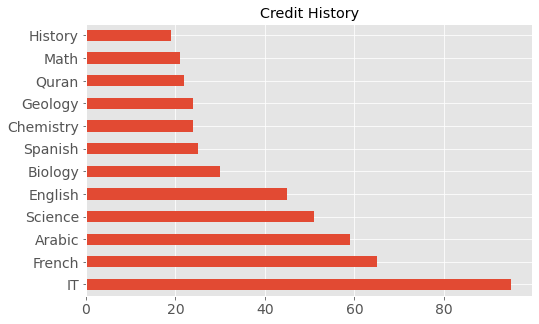

In [9]:
df["Topic"].value_counts().plot(kind="barh", title="Credit History", fontsize=14, figsize=(8,5))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   StageID                   480 non-null    object
 3   GradeID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    object
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

## Exercise 1 - Support Distance Algorithms


### Exercise 1.1

Convert all categorical features to support one-hot-vector encoding. 

In [11]:
dummy = pd.get_dummies(df)
dummy

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,1,0,1,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


### Exercise 1.2

Normalize all features to the closed range zero to one.

In [17]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(dummy), columns=dummy.columns)
data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0.15,0.161616,0.020408,0.193878,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.20,0.202020,0.030612,0.244898,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.10,0.070707,0.000000,0.295918,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.30,0.252525,0.051020,0.346939,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.40,0.505051,0.122449,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.05,0.040404,0.051020,0.071429,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
476,0.50,0.777778,0.142857,0.275510,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
477,0.55,0.747475,0.255102,0.285714,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
478,0.30,0.171717,0.142857,0.571429,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Exercise 1.3

Remove all NULL values

In [18]:
data.dropna(inplace=True)

### Exercise 1.4

Run K-Means and use the elbow method to estimate the number of clusters. 

![K_Means_Elbow_Method](https://raw.githubusercontent.com/satishgunjal/images/master/K_Means_Elbow_Method.png)


In [19]:
def get_kmeans_accuracy(data, top_k):
    sum_squared = []
    silhouette = []
    K = range(2, top_k)
    for i in K:
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(data)
        sum_squared.append(kmeans.inertia_)
        silhouette.append(silhouette_score(data, kmeans.labels_))
    return pd.DataFrame({
    "K": K,
    "SSE": sum_squared,
    "SIL": silhouette
  })

/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

<AxesSubplot:xlabel='K'>

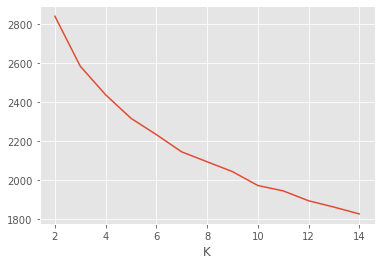

In [20]:
result = get_kmeans_accuracy(data, 15)
result.set_index("K", inplace=True)
result["SSE"].plot()

### Exercise 1.5

1. Choose the near optimal K by the elbow method. 
2. Create the clusters and plot their silhouette score.

In [21]:
result

,SSE,SIL
K,,
2,2838.622929,0.118173
3,2582.145301,0.116839
4,2435.804914,0.115008
5,2315.174087,0.108741
6,2231.549250,0.109820
7,2143.050565,0.116111
8,2092.406408,0.107687
9,2041.885816,0.118774
10,1970.642337,0.120140


In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
data["cluster"] = kmeans.labels_
data.groupby("cluster").describe()

/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


raisedhands                                                         \
              count      mean       std   min     25%    50%     75%   max   
cluster                                                                      
0             138.0  0.446957  0.286108  0.00  0.1625  0.500  0.7000  0.98   
1             186.0  0.652419  0.260679  0.05  0.5000  0.720  0.8375  1.00   
2             156.0  0.265962  0.238784  0.00  0.1000  0.185  0.4000  1.00   

        VisITedResources            ... StudentAbsenceDays_Above-7       \
                   count      mean  ...                        75%  max   
cluster                             ...                                   
0                  138.0  0.624799  ...                        1.0  1.0   
1                  186.0  0.717226  ...                        0.0  1.0   
2                  156.0  0.295260  ...                        1.0  1.0   

        StudentAbsenceDays_Under-7                                          \
                             count      mean       std  min  25%  50%  75%   
cluster                                                                      
0                            138.0  0.666667  0.473122  0.0  0.0  1.0  1.0   
1                            186.0  0.811828  0.391904  0.0  1.0  1.0  1.0   
2                            156.0  0.294872  0.457454  0.0  0.0  0.0  1.0   

              
         max  
cluster       
0        1.0  
1        1.0  
2        1.0  

[3 rows x 464 columns]

In [26]:
data.groupby("cluster").describe().T.to_excel("aaa.xlsx")

## Exercise 2 - Support Non-Metric Algorithms


### Exercise 2.1

Encode variables using LabelEncoder


In [27]:
data = pd.read_csv("students.csv")
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [30]:
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in  categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

data

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


### Exercise 2.2

Use 25% of training set and evaulate the results (present the confusion matrix)

In [31]:
# split between features to target
features = data.drop(columns=["Class"])
y = data["Class"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25)

### Exercise 2.3

Use the target variable and train Decision Tree classifier.

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7333333333333333

In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[24,  0, 11],
       [ 0, 16,  8],
       [ 8,  5, 48]])

### Exercise 2.4

Print the confusion matrix and the accuracy score of the model.

In [37]:
print(export_text(model, feature_names=list(df.columns)))

|--- StudentAbsenceDays <= 0.50
|   |--- VisITedResources <= 54.50
|   |   |--- VisITedResources <= 26.50
|   |   |   |--- Topic <= 9.50
|   |   |   |   |--- raisedhands <= 45.00
|   |   |   |   |   |--- NationalITy <= 7.00
|   |   |   |   |   |   |--- GradeID <= 7.50
|   |   |   |   |   |   |   |--- VisITedResources <= 8.50
|   |   |   |   |   |   |   |   |--- Topic <= 3.50
|   |   |   |   |   |   |   |   |   |--- GradeID <= 4.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- GradeID >  4.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Topic >  3.50
|   |   |   |   |   |   |   |   |   |--- Discussion <= 45.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Discussion >  45.50
|   |   |   |   |   |   |   |   |   |   |--- raisedhands <= 5.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- raise

## Based on this result, what is the major problem of single decision tree?